### Central Limit Theorem ###

<div style="text-align: justify">

***CLT*** has different statements but the main idea behind this theorem is that if we have a sequence of independent and identically distributed random 
variables ***( i.i.d )*** , $\{X_1 , X_2, X_3 , ... , X_n \}$ with an expected value of $E(X_i) = \mu$ and variance of $ Var(X_i) = \sigma^2$ , then we can 
define a new random variable , ***Sample Mean*** such that $\large\bar{X_n} = \frac{X_1 + X_2 + ... X_n}{n}$ and for $n \rightarrow \infty$ the 
distribution of $\large\frac{(\bar{X_n} - \mu)}{\sigma_{\bar{X_n}}} $ approximates a normal standard distribution  $\mathcal{N}(0,1)$. 

We have chosen three distributions, namely ***Cauchy***, ***Beta*** and ***Poisson*** . The rationale behind choosing Cauchy's was to demonstrate that CLT does not apply to every possible distribution. Here it could be justified by noting that this distribution has an undefined Expected Value and Variance and hence, results in making the variable we introduced meaningless. but for the other two, Beta and Poisson, we can theoretically and explicitly see the accuracy of this theorem. the number of samples was increased and the the results we obvious and as predicted with the theorem; the larger our sample was, the more overlapping of the distributions was seen. 

</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson, beta, cauchy

In [28]:
def generate_samples(distribution, params, sample_size, num_samples):

    if distribution == poisson:
        samples = [distribution.rvs(params, size=sample_size) for _ in range(num_samples)]
    elif distribution == beta:
        samples = [distribution.rvs(*params, size=sample_size) for _ in range(num_samples)]
    elif distribution == cauchy:
        samples = [distribution.rvs(*params, size=sample_size) for _ in range(num_samples)]
    
    return np.array(samples)

def plot_sample_means(distribution, params, sample_sizes, num_samples=1000):

    for sample_size in sample_sizes:
        samples = generate_samples(distribution, params, sample_size, num_samples)
        sample_means = samples.mean(axis=1)
        
        plt.figure(figsize=(12,6))
        plt.hist(sample_means, bins=50, density=True, alpha=0.6, color='g', label='Sample Means')
        
        mean, var = distribution.stats(*params, moments='mv')
        std_dev = np.sqrt(var / sample_size)
        norm_dist = norm(loc=mean, scale=std_dev)
        x = np.linspace(norm_dist.ppf(0.01), norm_dist.ppf(0.99), 100)
        plt.plot(x, norm_dist.pdf(x), 'r-', lw=2, label='Normal Distribution')
        
        plt.title(f'Sample Size: {sample_size}')
        plt.legend()
        plt.show()

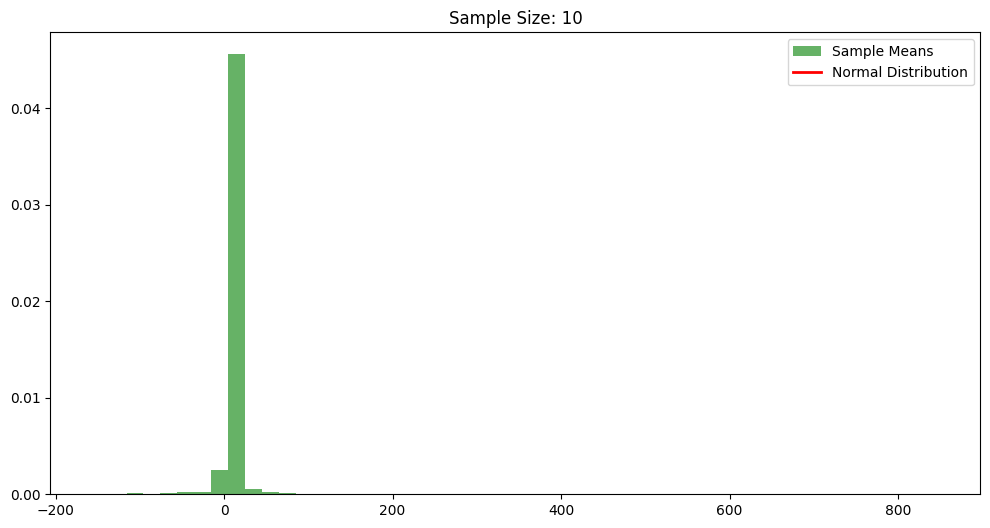

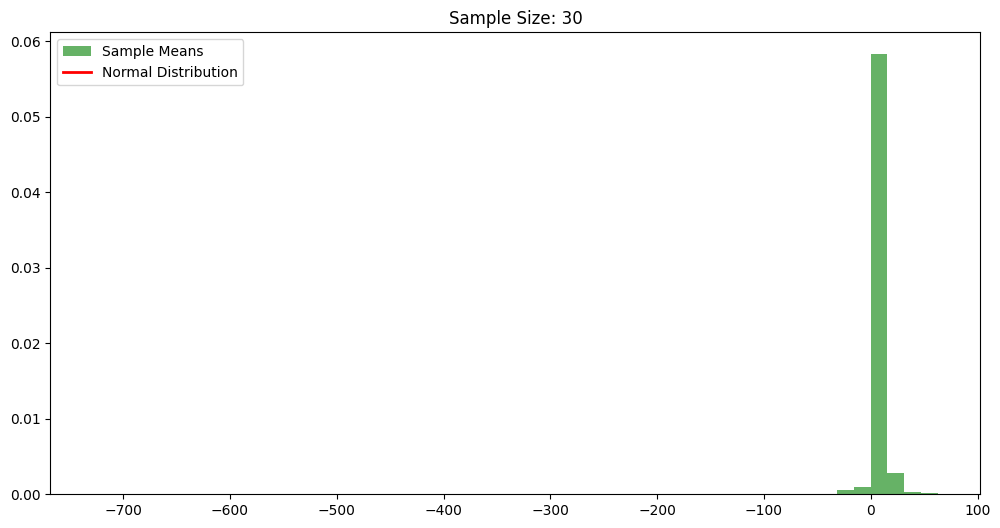

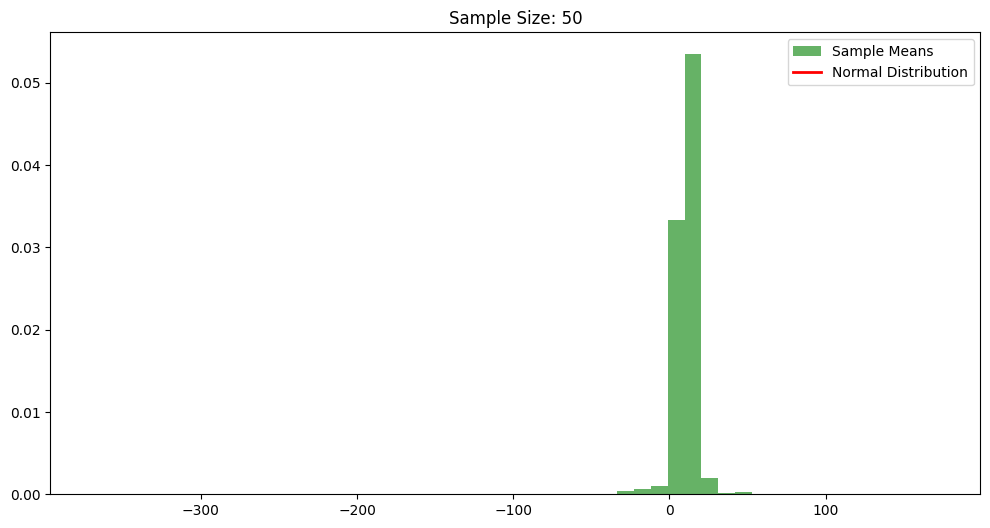

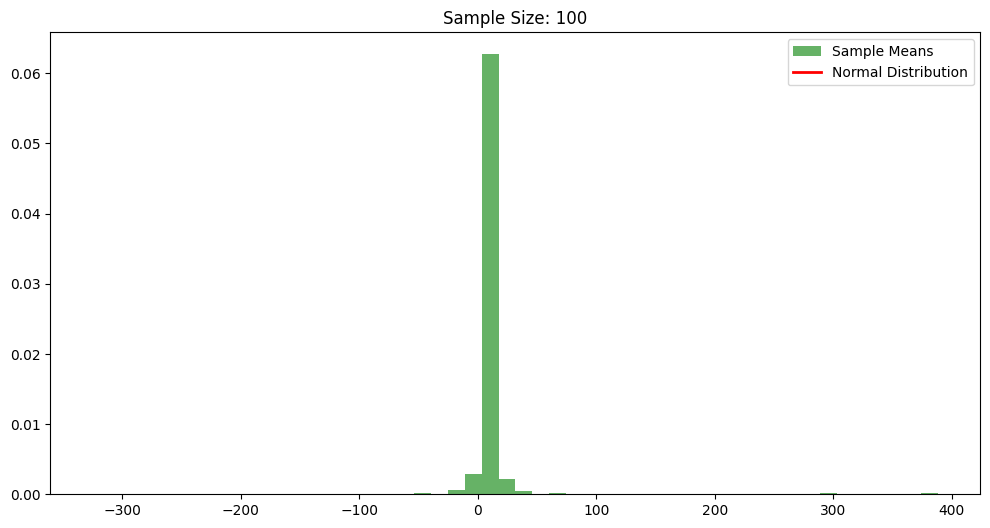

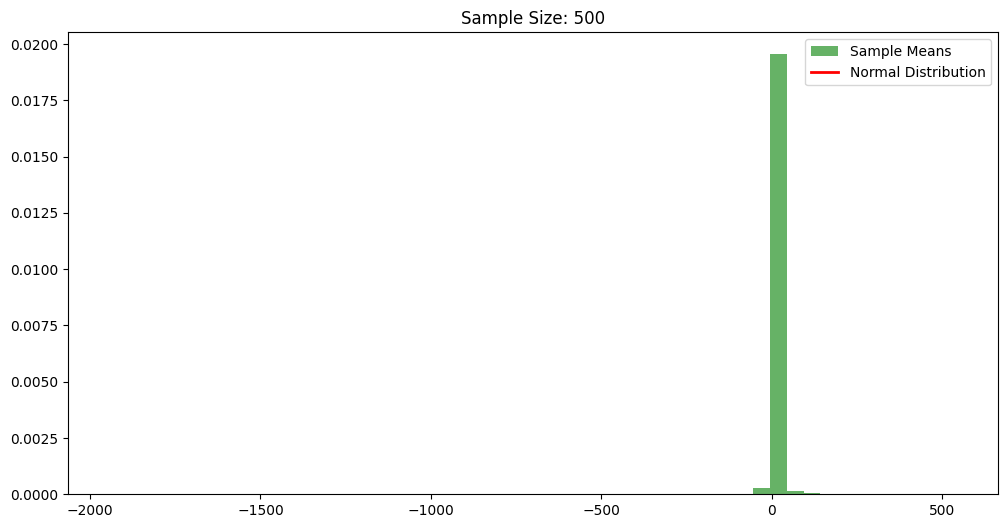

In [29]:
plot_sample_means(cauchy, (10, 1), [10, 30, 50, 100, 500])

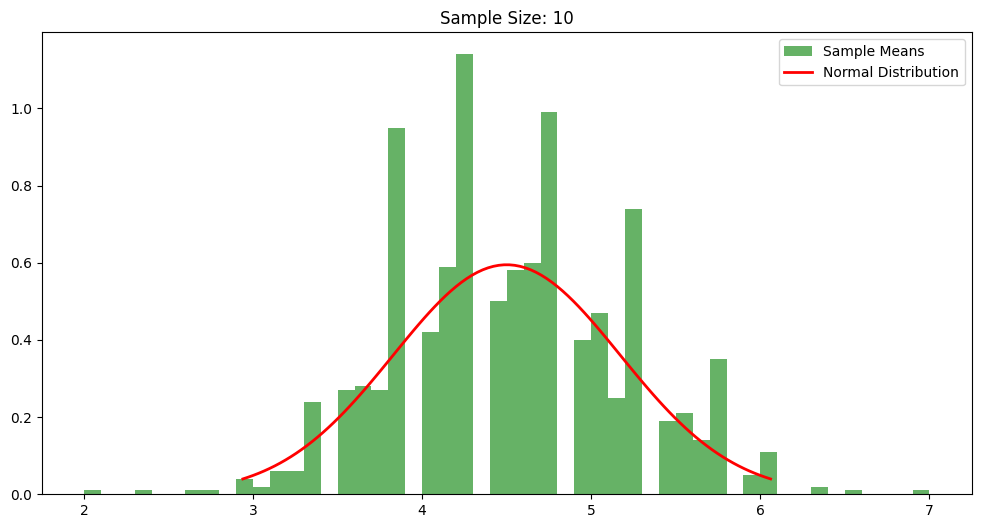

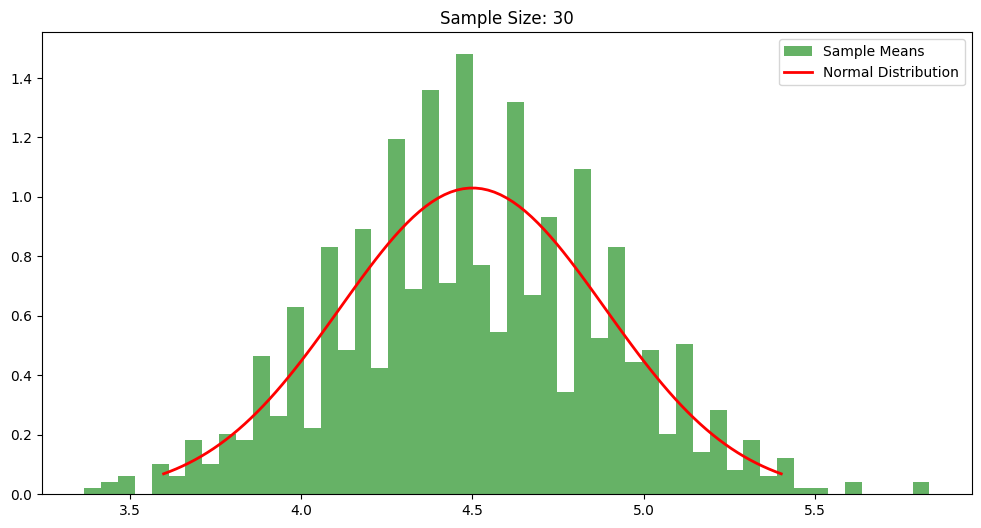

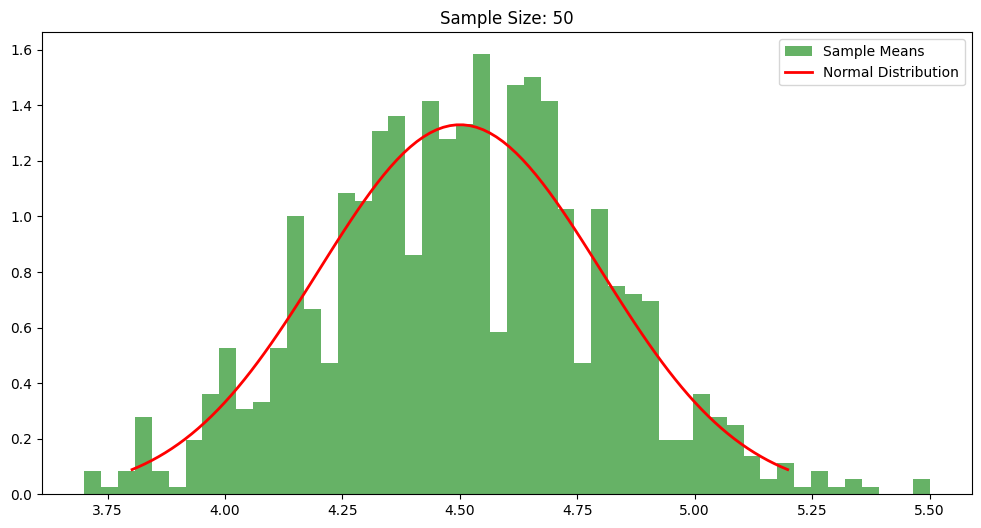

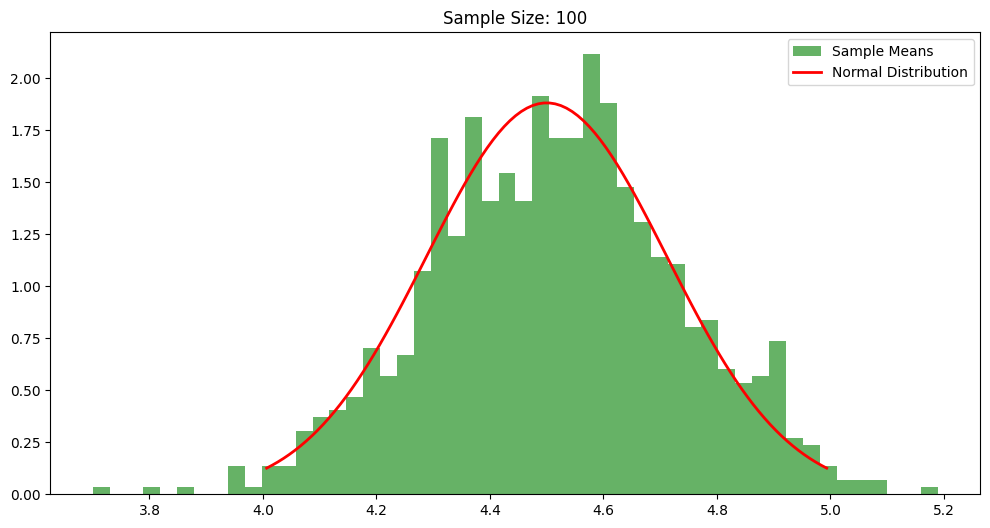

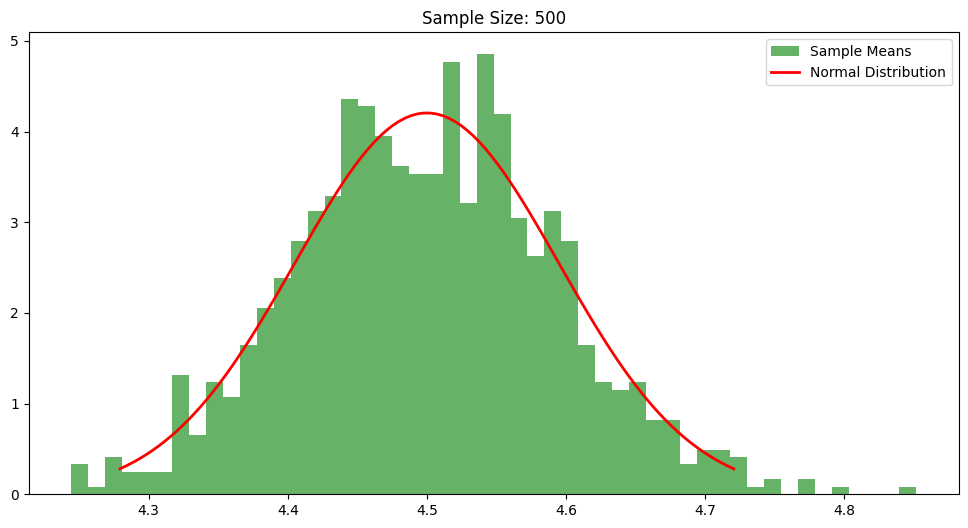

In [30]:
plot_sample_means(poisson, (4.5,), [10, 30, 50, 100, 500])

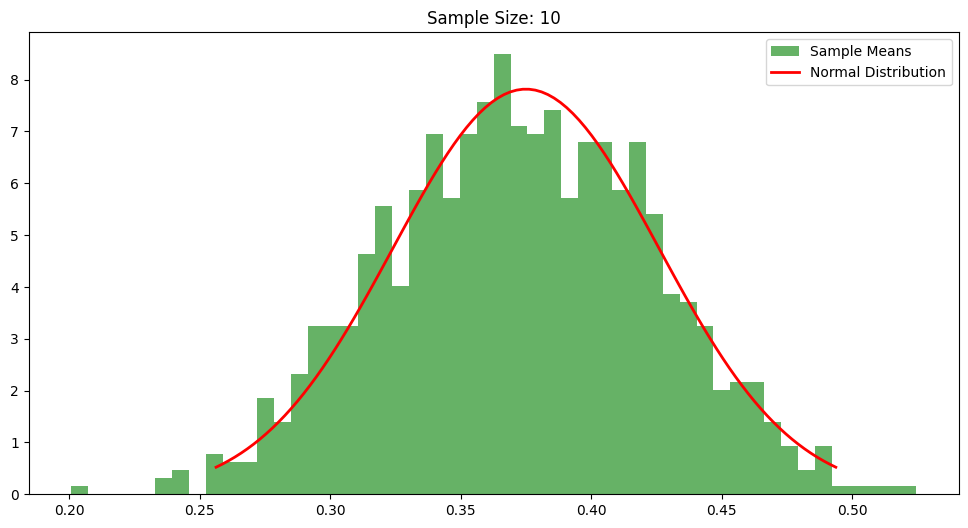

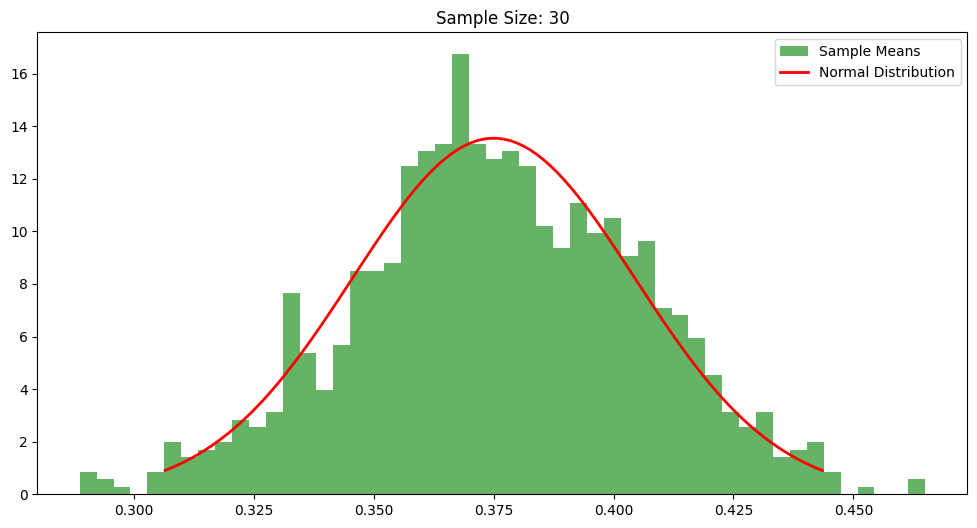

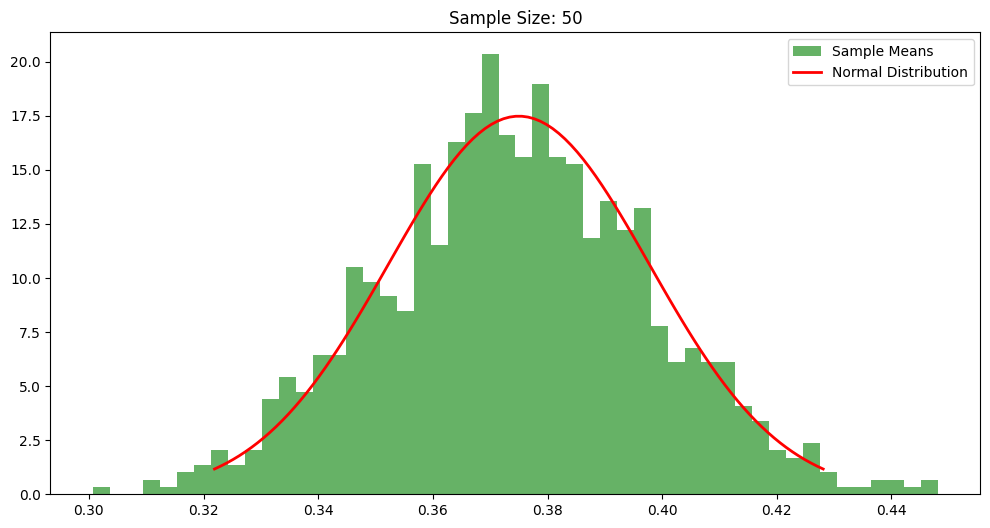

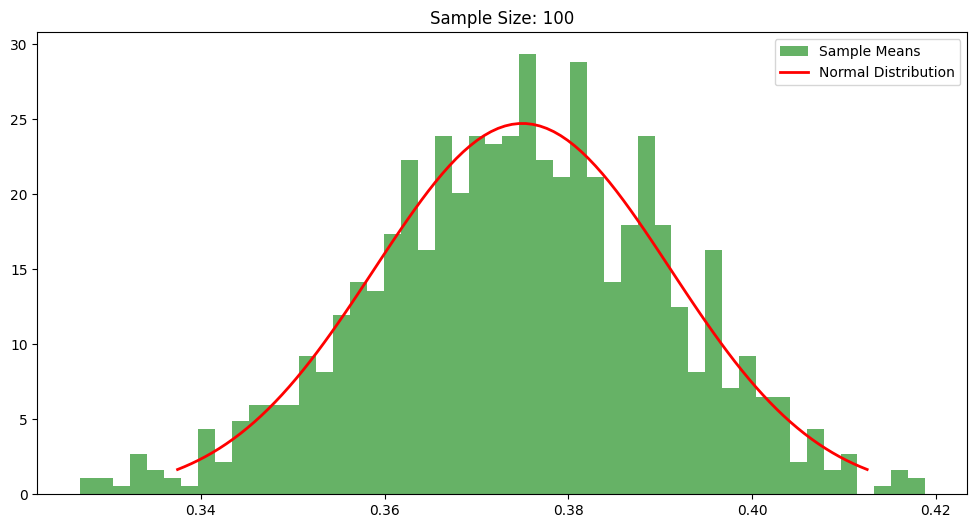

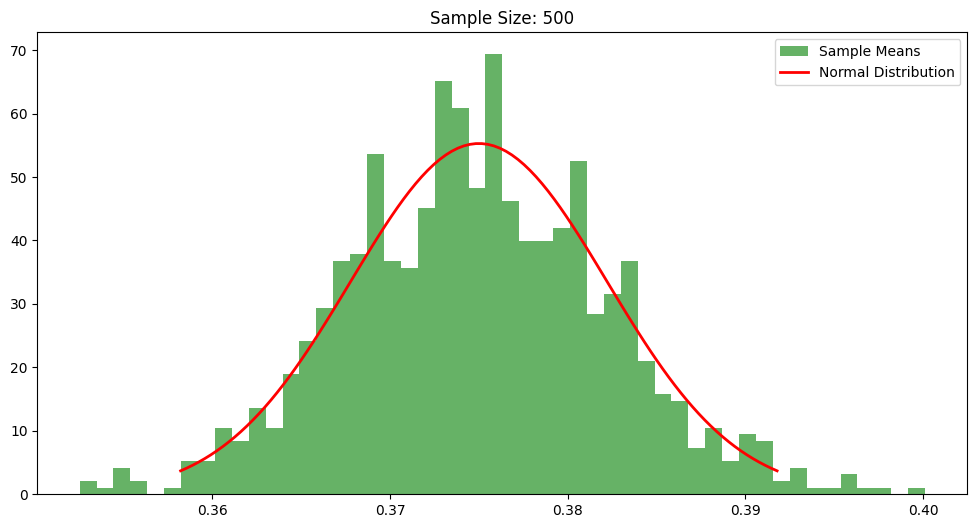

In [31]:
plot_sample_means(beta, (3, 5), [10, 30, 50, 100, 500])

### Question : How does the sample size affect your plots in part 2(CLT)? What can you understand from these plots? ###
<div style="text-align: justify">

***as it can be seen, by increasing the size of our sample, the normal approximation improves. it also can be inferred from the plots that sample means distribution of Cauchy does not converge to normal distribution because of not possessing a finite mean and variance; while for Beta and Poisson distribution it does and the approximation becomes more accurate when the sample size is increased***

</div>